In [53]:
import pandas as pd 
import matplotlib.pyplot as plt 
from datetime import datetime 

In [54]:
df = pd.read_csv("/users/jasonlu/Downloads/shot_logs.csv", names = ["GAME_ID","MATCHUP","LOCATION","W","FINAL_MARGIN",
                                                             "SHOT_NUMBER","PERIOD","GAME_CLOCK","SHOT_CLOCK","DRIBBLES",
                                                             "TOUCH_TIME","SHOT_DIST","PTS_TYPE","SHOT_RESULT",
                                                             "CLOSEST_DEFENDER","CLOSEST_DEFENDER_PLAYER_ID",
                                                             "CLOSE_DEF_DIST","FGM","PTS","player_name","player_id"])

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0,4,5,6,8,9,10,11,12,15,16,17,18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [55]:
len(df)

128070

In [56]:
df.iloc[1]

GAME_ID                                       21400899
MATCHUP                       MAR 04, 2015 - CHA @ BKN
LOCATION                                             A
W                                                    W
FINAL_MARGIN                                        24
SHOT_NUMBER                                          1
PERIOD                                               1
GAME_CLOCK                                        1:09
SHOT_CLOCK                                        10.8
DRIBBLES                                             2
TOUCH_TIME                                         1.9
SHOT_DIST                                          7.7
PTS_TYPE                                             2
SHOT_RESULT                                       made
CLOSEST_DEFENDER                        Anderson, Alan
CLOSEST_DEFENDER_PLAYER_ID                      101187
CLOSE_DEF_DIST                                     1.3
FGM                                                  1
PTS       

In [57]:
len(df.iloc[0])

21

In [58]:
# make an event distribution map 
import numpy as np
# get the square root of the Celtics starters' point score distribution vs. Indiana Pacers Game 4 
# source: http://www.espn.com/nba/boxscore?gameId=401126865&wsVar=us~nba~gamepackage,desktop,en
pts = pd.DataFrame([[18, 2 ,14, 14, 13],] * 6, columns=['Tatum', 'Baynes','Horford', "Irving", "Brown"])
pts
pts.apply(np.sqrt)

,Tatum,Baynes,Horford,Irving,Brown
0,4.242641,1.414214,3.741657,3.741657,3.605551
1,4.242641,1.414214,3.741657,3.741657,3.605551
2,4.242641,1.414214,3.741657,3.741657,3.605551
3,4.242641,1.414214,3.741657,3.741657,3.605551
4,4.242641,1.414214,3.741657,3.741657,3.605551
5,4.242641,1.414214,3.741657,3.741657,3.605551


In [59]:
pts.plot(kind='bar')

In [60]:
plt.gca().axes.get_xaxis().set_ticks([])

[]

In [61]:
plt.ylabel("points per game distribution")

Text(0,0.5,'points per game distribution')

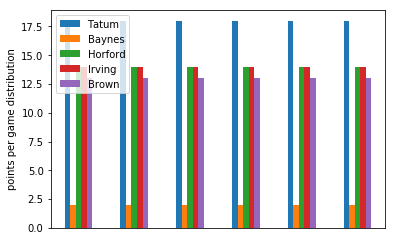

In [62]:
plt.show()

In [67]:
# Group the events by points per game distribution 
group = df[['PTS','player_id']].groupby(['player_id']).count()\
                .sort_values(['PTS'], ascending=True)
group.columns = ['Games']
group.reset_index()

,player_id,Games
0,player_id,1
1,101161,23
2,202962,47
3,202366,88
4,201595,93
5,203459,94
6,2034,94
7,203925,100
8,201946,101
9,2045,102
